In [1]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. Data Preprocessing

In [2]:
import pandas as pd

# 데이터 불러와서 변수에 저장
for month in range(9,11):
    for day in range(1,31):

        refined_month = str(month).zfill(2)
        refined_day = str(day).zfill(2)

        file_name = f'data_{refined_month}_{refined_day}'

        file_path = fr'D:\KNU\2-2\산학 Final\Non Time series\2023-{refined_month}-{refined_day}.csv'

        # CSV 파일 읽기 (EUC-KR로 인코딩된 경우)
        data = pd.read_csv(file_path, encoding='euc-kr',index_col=False)
        globals()[file_name] = data.set_index(data.columns[0])

In [3]:
''' Notice : 시계열 데이터로 처리하고 싶으면 이부분 전처리 코드 바꾸면 됩니다. '''

combined_df = pd.DataFrame()

for month in range(9,11):
    for day in range(1,31):

        refined_month = str(month).zfill(2)
        refined_day = str(day).zfill(2)

        file_name = f'data_{refined_month}_{refined_day}'

        combined_df = pd.concat([combined_df, globals()[file_name]], ignore_index=False)

In [4]:
not_zero_df = combined_df[combined_df['열 손실법 효율'] != 0]

In [5]:
columns_to_remove = []

for column in not_zero_df.columns:
    # 모든 값이 동일한지 확인
    if not_zero_df[column].nunique() == 1:
        columns_to_remove.append(column)
        print(f"칼럼 '{column}'의 모든 값은 동일합니다.")

칼럼 '설정 압력'의 모든 값은 동일합니다.
칼럼 '재순환 댐퍼'의 모든 값은 동일합니다.
칼럼 '버너온도'의 모든 값은 동일합니다.
칼럼 '재순환 NOx'의 모든 값은 동일합니다.


In [6]:
# 칼럼 제거
columns_to_remove.append('정상 운전 확률')
columns_to_remove.append('확률 업데이트 시간')
columns_to_remove.append('운전시간')
columns_to_remove.append('입출력법 효율')
columns_to_remove.append('효율(순간)')

In [7]:
droped_df = not_zero_df.drop(columns_to_remove, axis=1)

In [8]:
droped_df.columns

Index(['부하율', '보일러 압력', '송풍기 인버터 출력', '송풍기 입력', '급수 펌프', '급수펌프 입력', '가스 댐퍼',
       '가스 댐퍼 입력', 'Air 댐퍼', 'Air 댐퍼 입력', '재순환 외기 댐퍼', '재순환 댐퍼 입력',
       '재순환 외기 댐퍼 입력', '급수 수위', '보일러 온도', '배기가스온도1', '배기가스온도2', '배기가스온도3',
       '배기 재 순환 온도', '에코 온도1', '에코 온도2', '배기가스 NOx', '배기가스 O2', '재순환 O2',
       '급수량(적산유량)', '급수량(순간유량)', '연료량(적산유량)', '연료량(순간유량)', '소비전류', '진동센서1',
       '진동센서2', '송풍기 고장 확률', 'AIR 댐퍼 고장 확률', 'GAS 앰퍼 고장 확률', '열 손실법 효율'],
      dtype='object')

## 2. PCA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(droped_df)
data = pd.DataFrame(scaled_data, columns=droped_df.columns)

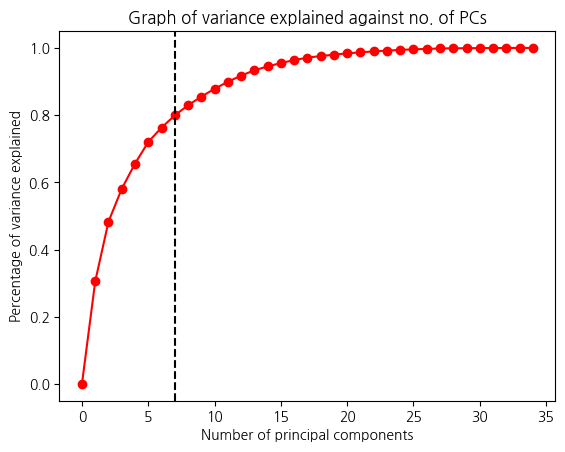

Total percentage variance explained with 7 principal components: 0.799


            PC1       PC2       PC3       PC4       PC5
0     -0.884030  4.421060  2.676368 -2.095196 -2.217428
1     -1.266904  4.180415  2.654893 -2.156837 -2.024618
2     -1.512448  4.082569  2.747135 -2.363205 -1.852873
3     -1.582488  4.081910  2.713102 -2.177094 -1.934024
4     -1.761936  3.739146  3.112849 -1.973687 -1.904304
...         ...       ...       ...       ...       ...
87951  6.073244  4.243190  0.835716  1.786479 -1.793201
87952  5.910505  4.370906  0.810350  1.823765 -1.912279
87953  5.810824  4.441070  0.797993  1.848327 -1.980126
87954  5.722523  4.443549  0.867818  1.467525 -1.763157
87955  5.820425  4.469410  0.799573  1.854526 -1.991230

[87956 rows x 5 columns]


In [10]:
import matplotlib.pyplot as plt

def optimise_pca(norm):
    explained_var = []
    principal_components = []
    for i in range(0,len(norm.columns),1): # For loop from 0 to 49 principal components to calculate their respective percentage of variance.

        # Initialise the PCA function with the i number of principal components.
        pca_model = PCA(n_components=i) 
        
        # Fits the model with norm and applies PCA on norm to return dataset with i number of principal components
        pca_model.fit_transform(norm)

        # Using the attribute ".explained_variance_ratio" returns percentage of variance explained by each selected component.
        # This result is then summed up to obtained percentage of variance explained for i number of components.
        # It is appended into explained_var to be plotted as the y-axis.
        explained_var.append(sum(pca_model.explained_variance_ratio_)) 
        
        # The number of principal components, i, is appended to principal_components to be plotted as the x-axis.
        principal_components.append(i)

    # Plot graph of "Percentage of variance explained" against "Number of principal components"
    # Using this graph, the optimal number of dimensions can be found via the elbow method
    plt.plot(principal_components, explained_var, color="red", marker="o")
    plt.title("Graph of variance explained against no. of PCs")
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage of variance explained")
    plt.axvline(7, color='black', linestyle='--')
    plt.show()

def pca(norm, symbols, n):

    # Initialise the PCA function with the n number of principal components.
    pca_model = PCA(n_components=n)

    # Fits the model with norm and applies PCA on norm to return dataset with n number of principal components
    components = pca_model.fit_transform(norm)

    # print(f"{n} largest eigenvalues of the covariance matrix:\n{pca_model.explained_variance_}")
    # print(f"Percentage of variance explained by each component:\n{pca_model.explained_variance_ratio_}")
    print(f"Total percentage variance explained with {n} principal components: {round(sum(pca_model.explained_variance_ratio_),3)}\n")
    print()

    # Create dataset (that has been reduced to n number of principal components) in proper format using pd.Dataframe(data,columns,index): 
    pca_df = pd.DataFrame(components, columns=[f"PC{k}" for k in range(1,n+1)],index=symbols)
    return pca_df

norm_symbols = data.index
optimise_pca(data) 

pca_df = pca(data, norm_symbols, n=7)
print(pca_df.iloc[:,:5])

In [11]:
pca = PCA(7)
pca.fit(droped_df)

PCA(n_components=7)

### 주성분의 시계열 및 베타 로딩 확인

#### 첫번쨰 주성분 분석

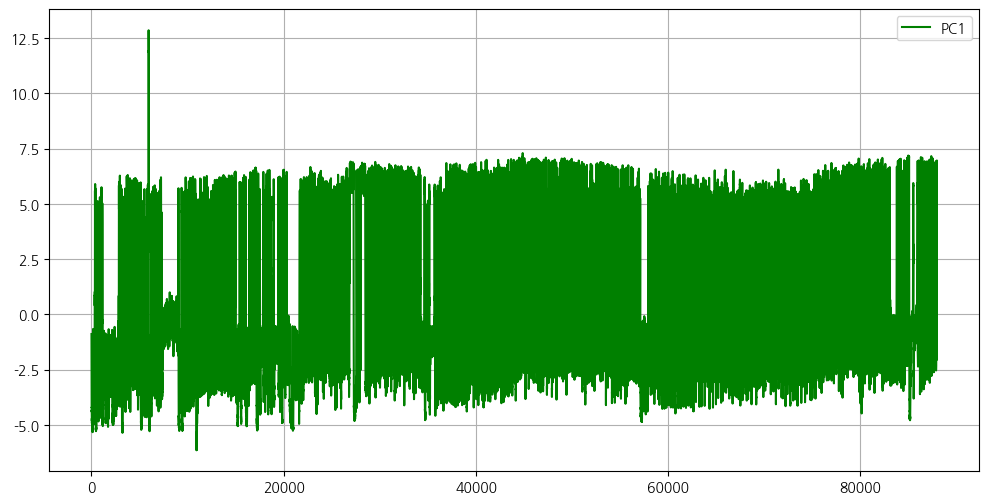

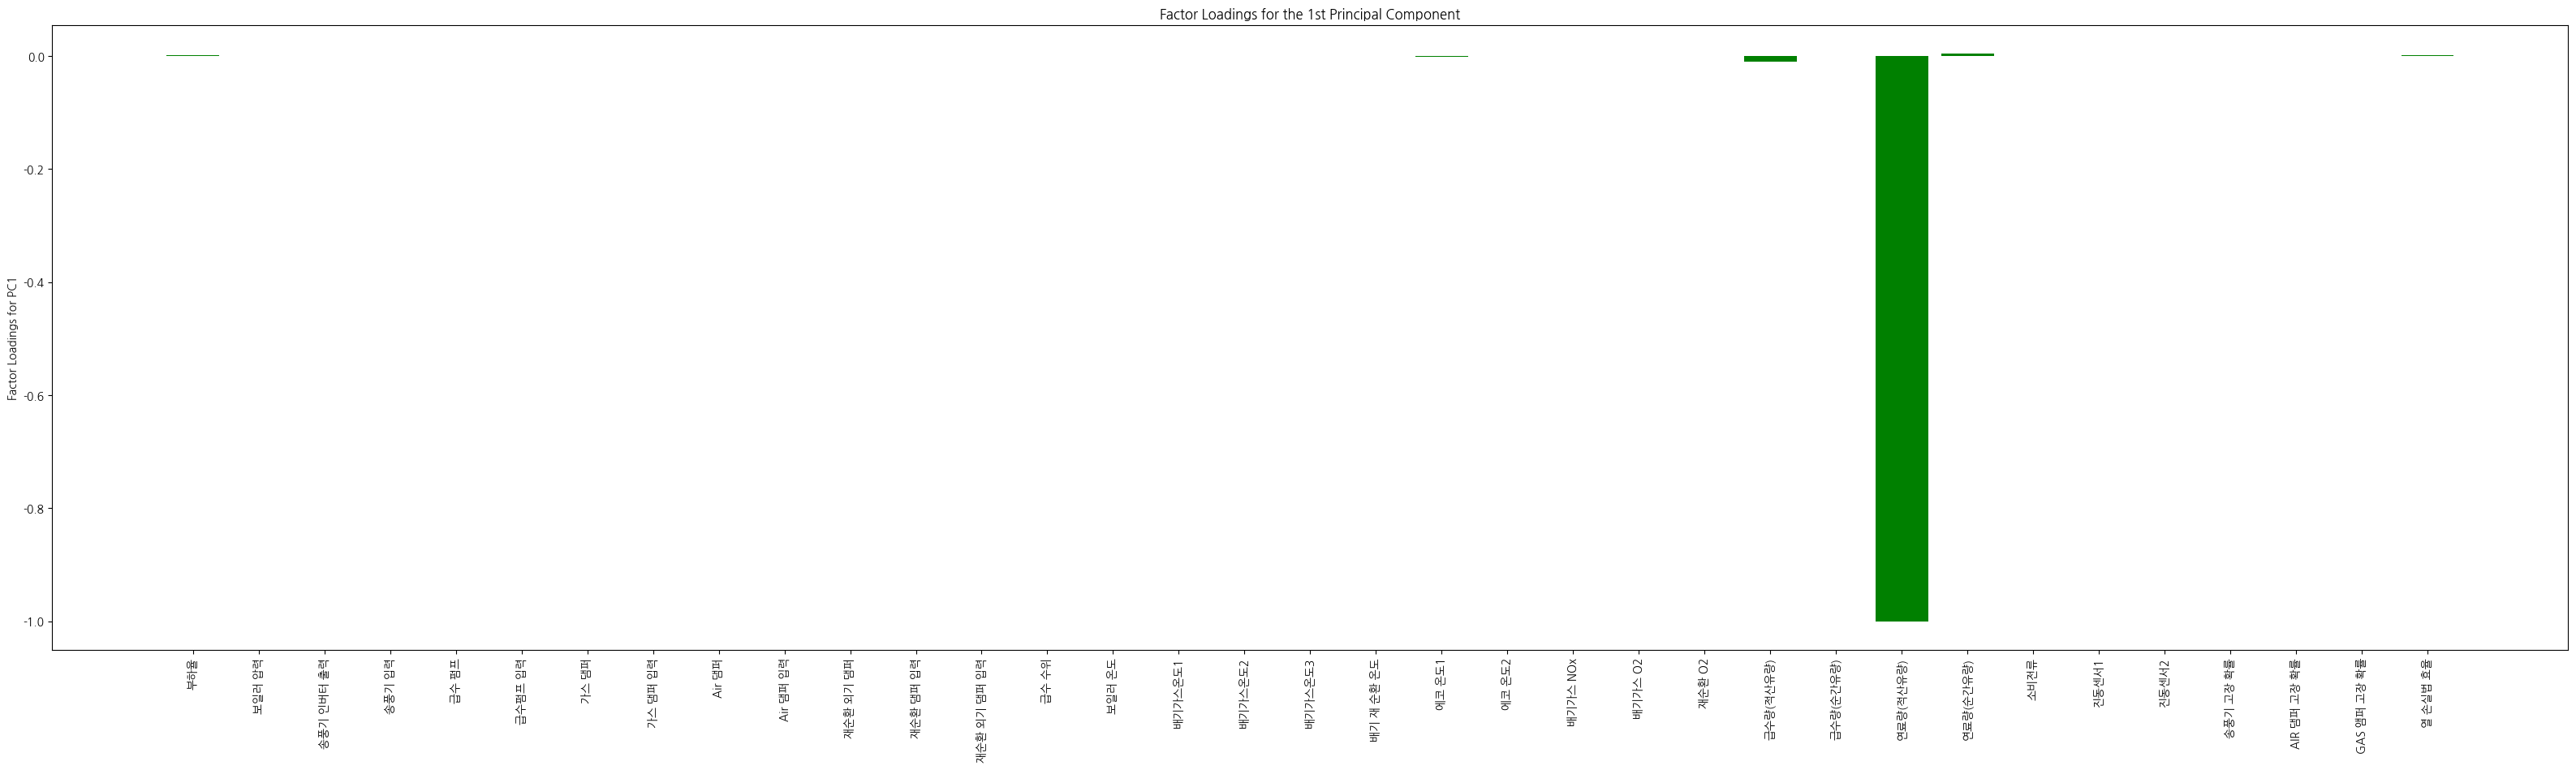

In [12]:
Cumulative_df = pca_df['PC1']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC1', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[0]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC1')
plt.title('Factor Loadings for the 1st Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 두번쨰 주성분 분석

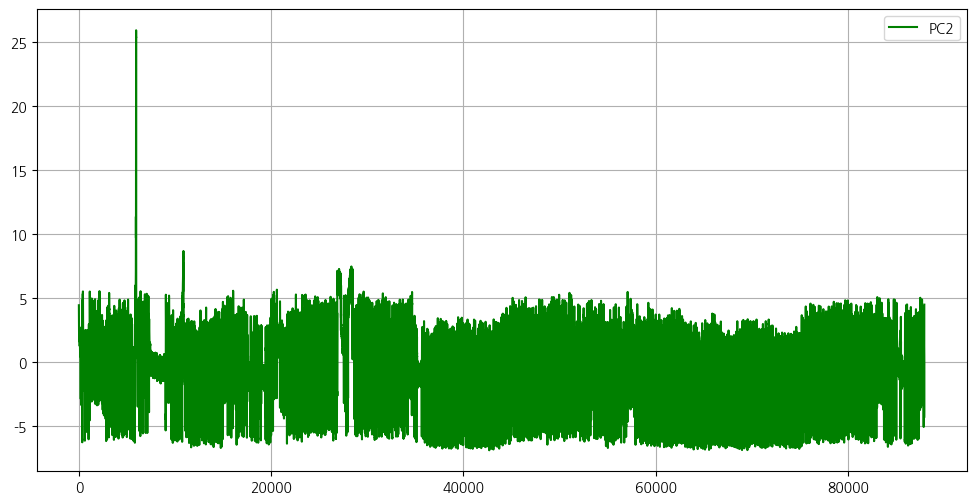

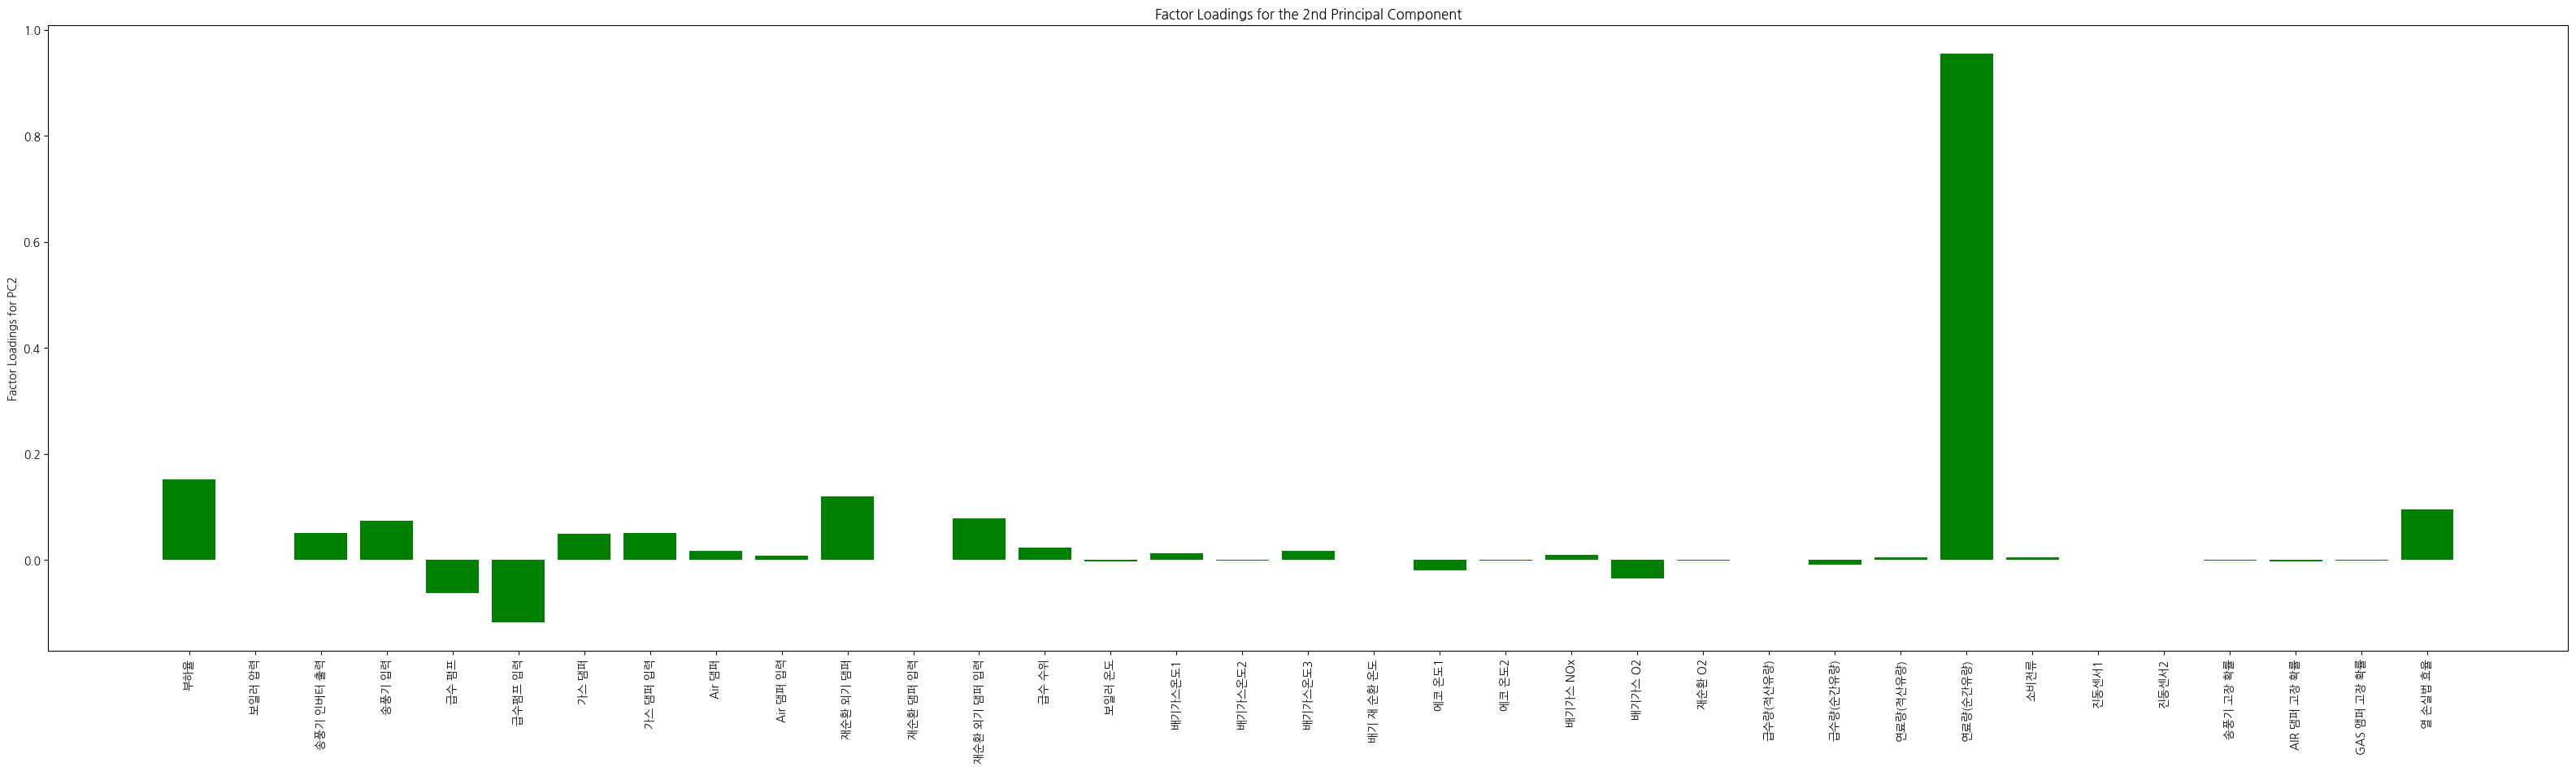

In [13]:
Cumulative_df = pca_df['PC2']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC2', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[1]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC2')
plt.title('Factor Loadings for the 2nd Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 세번쨰 주성분 분석

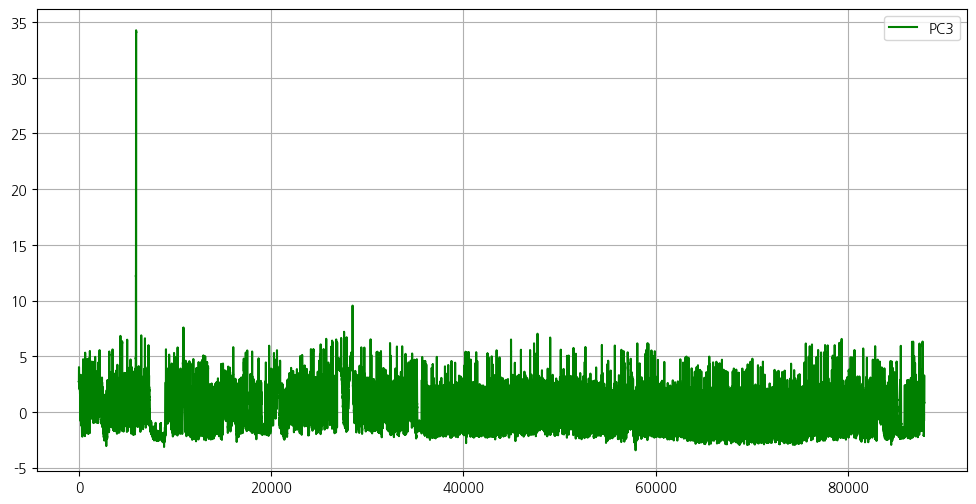

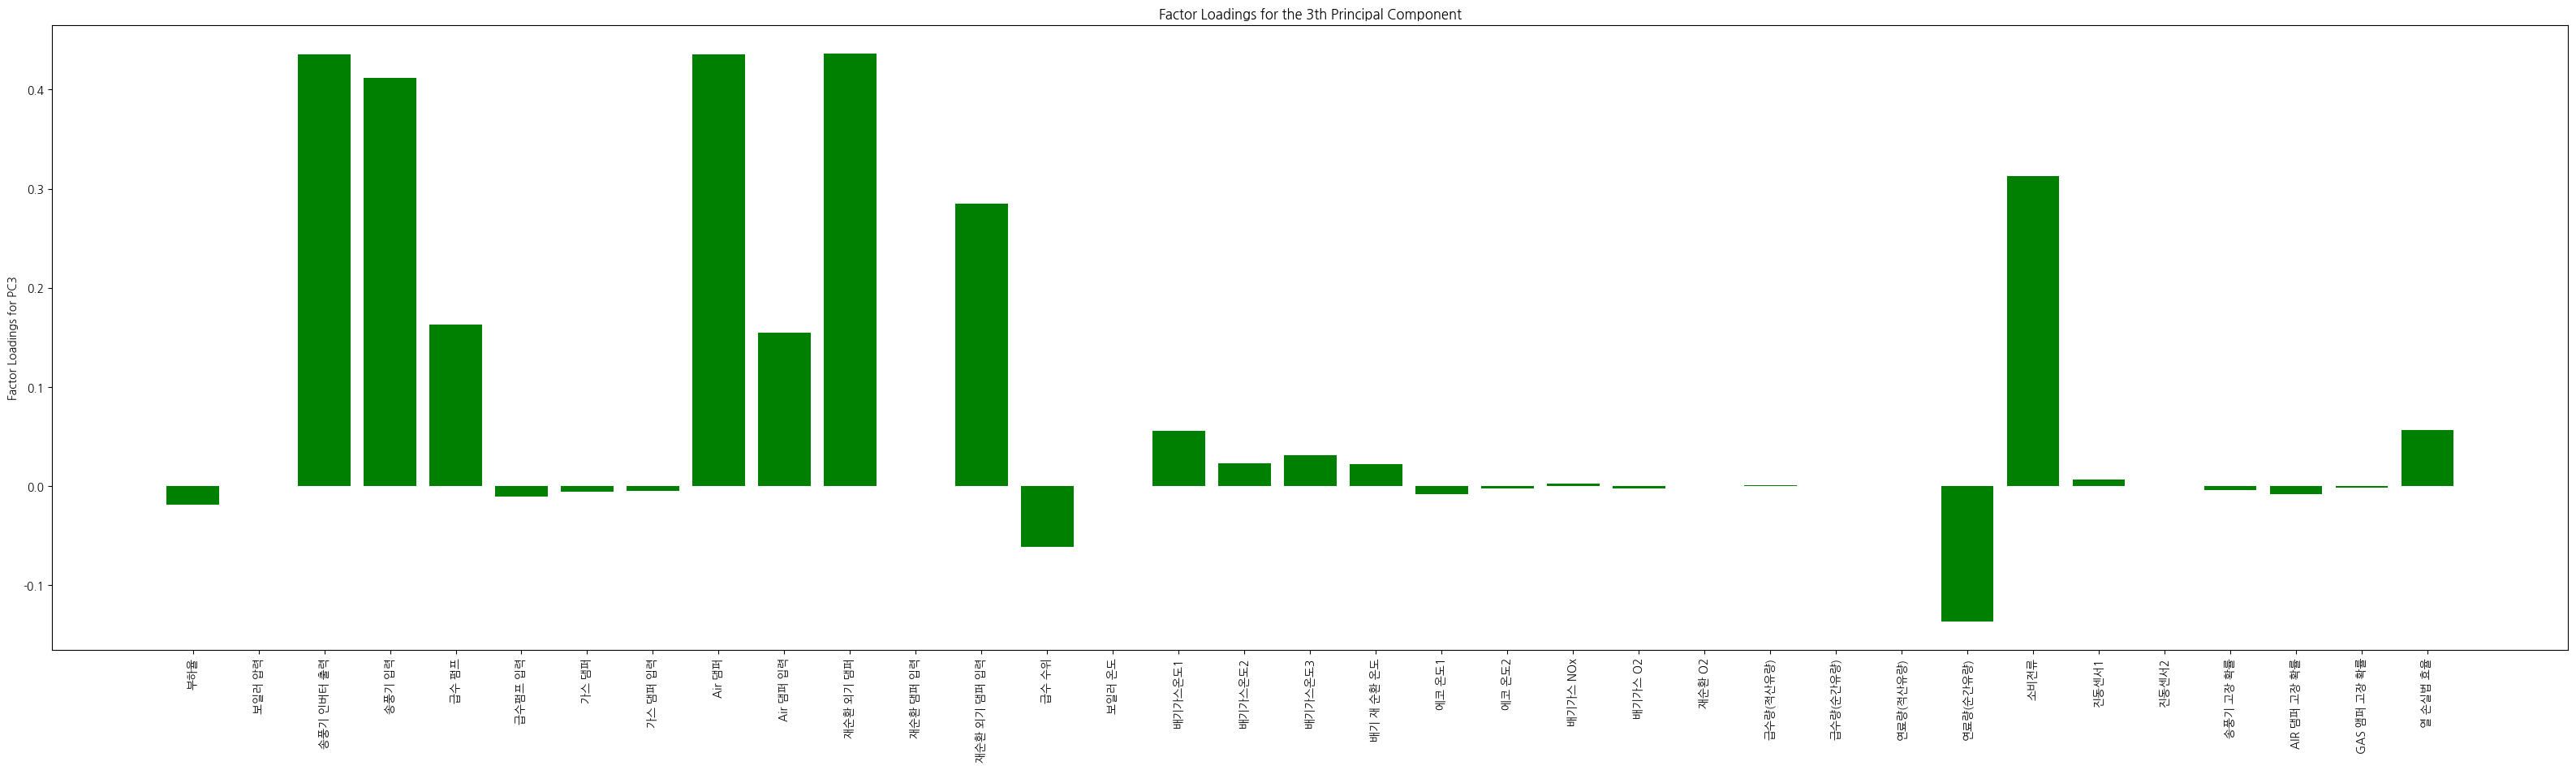

In [14]:
Cumulative_df = pca_df['PC3']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC3', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[2]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC3')
plt.title('Factor Loadings for the 3th Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 네번쨰 주성분 분석

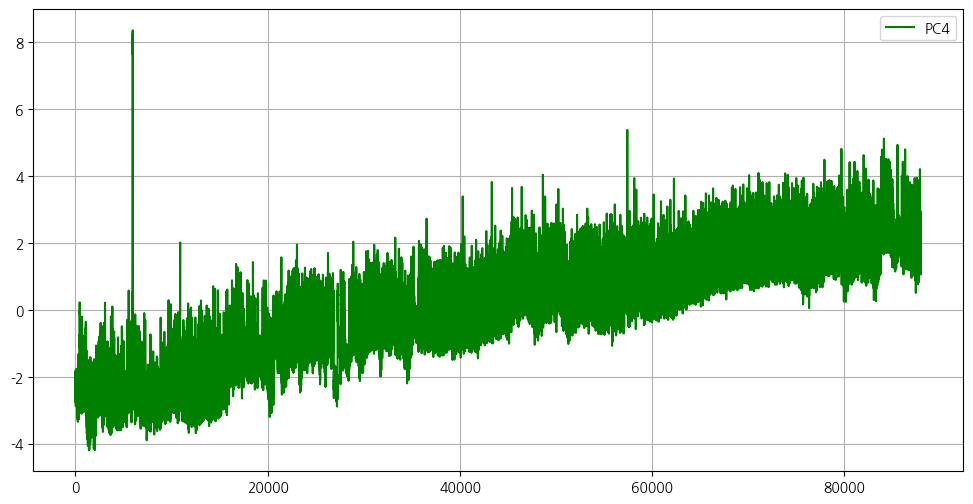

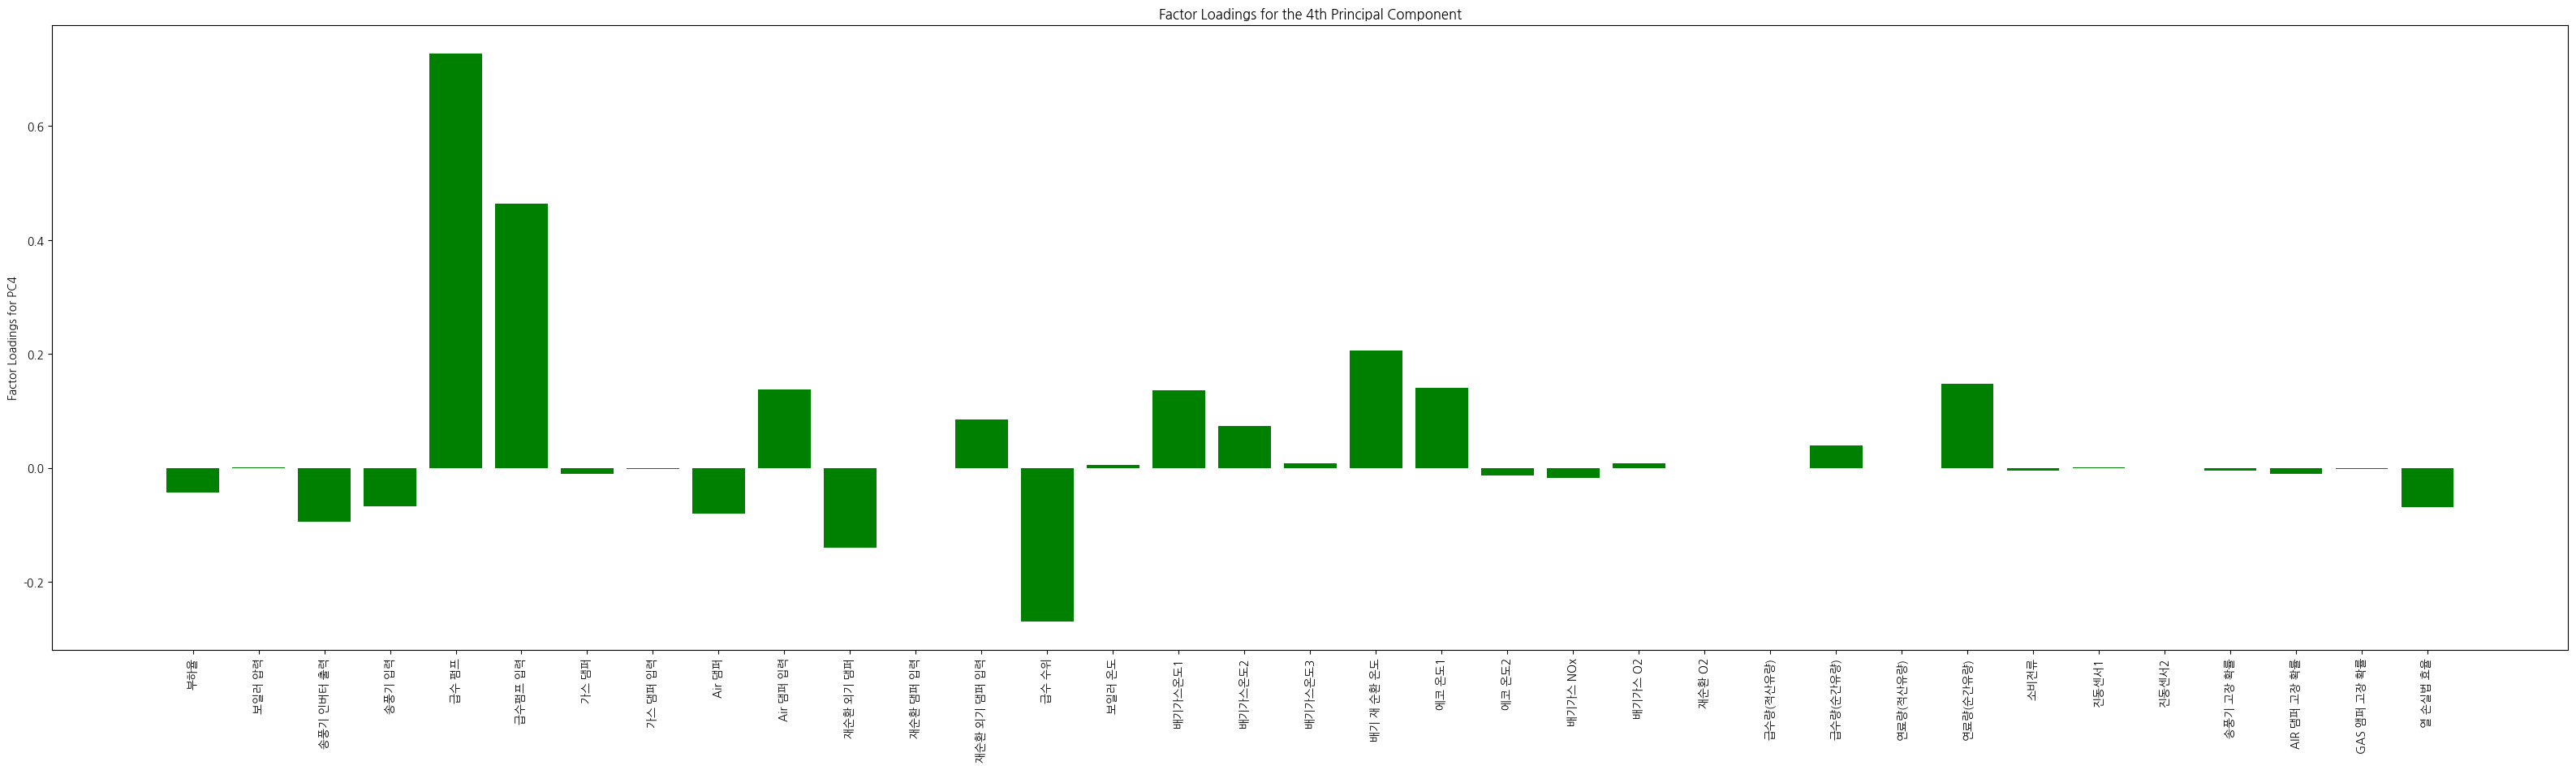

In [15]:
Cumulative_df = pca_df['PC4']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC4', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[3]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC4')
plt.title('Factor Loadings for the 4th Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 다섯번쨰 주성분 분석

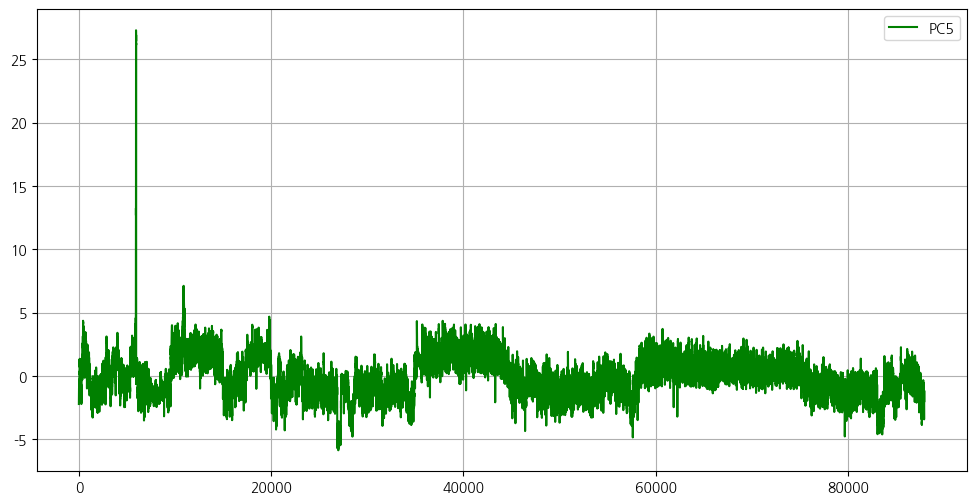

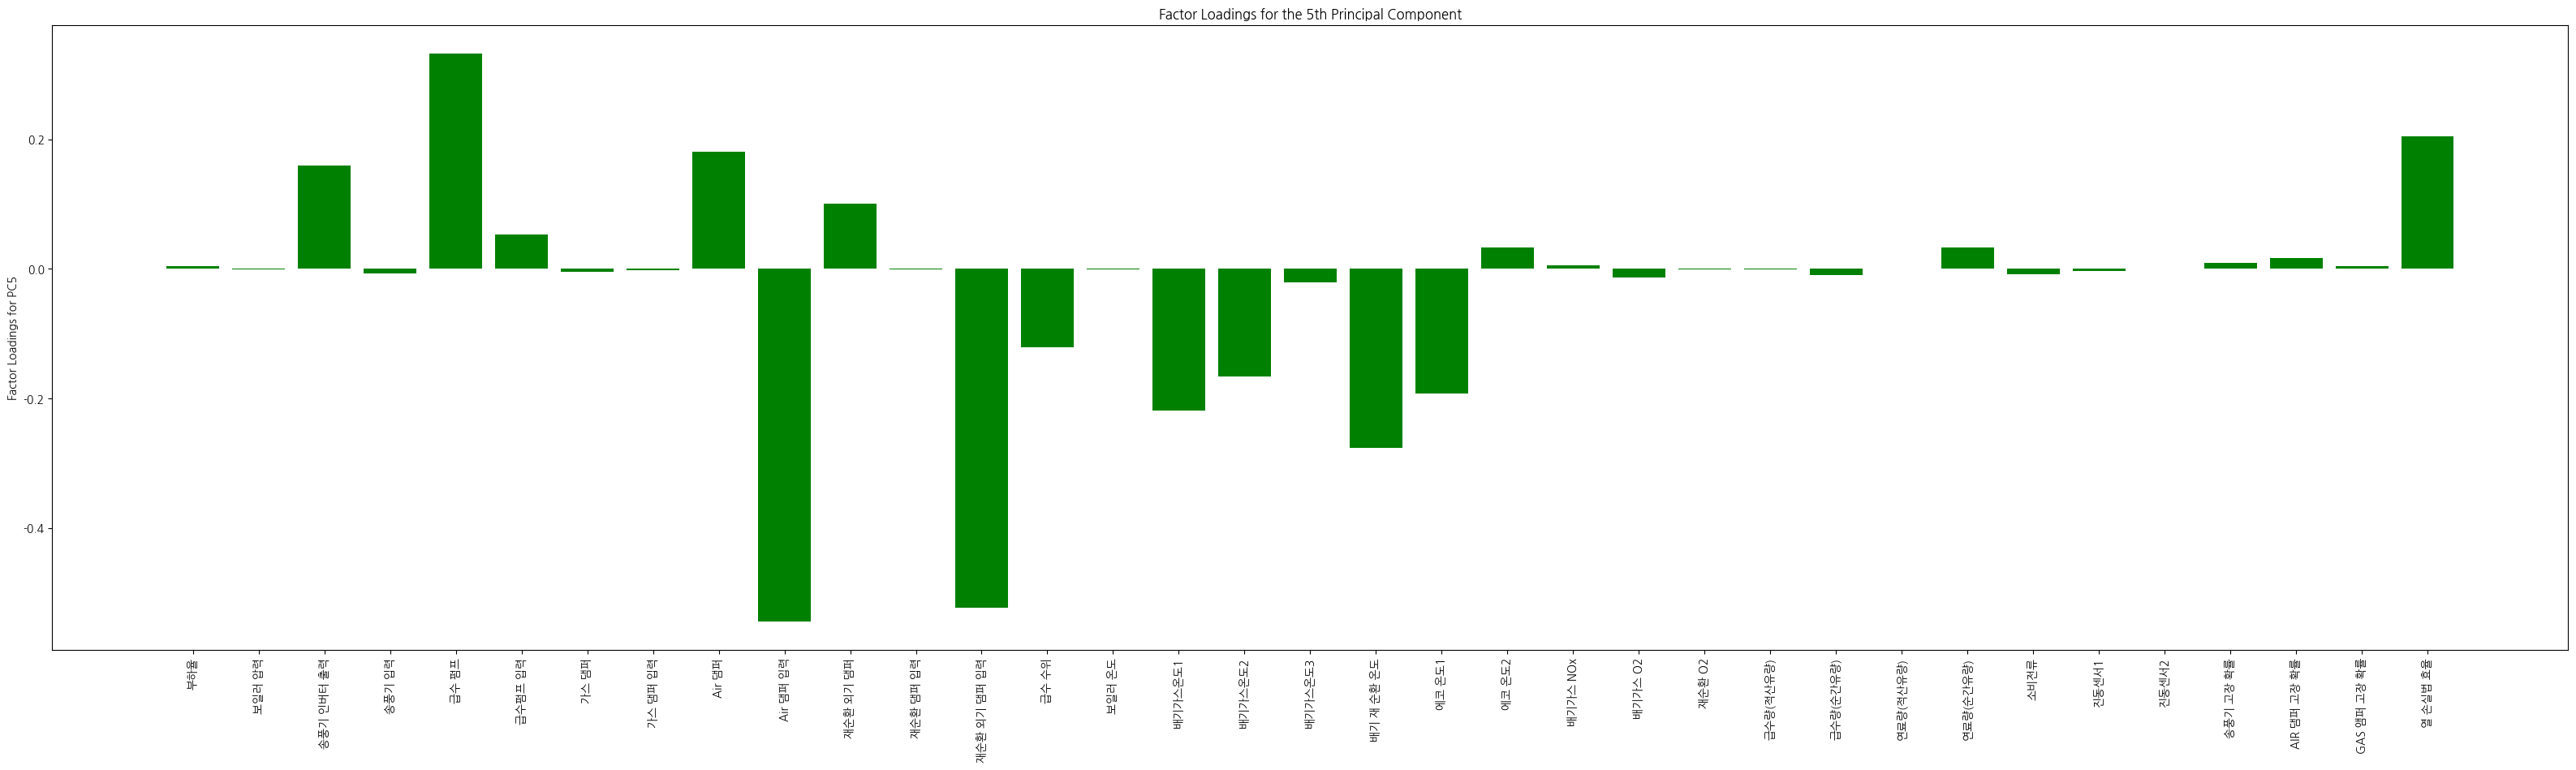

In [16]:
Cumulative_df = pca_df['PC5']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC5', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[4]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC5')
plt.title('Factor Loadings for the 5th Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 여섯번쨰 주성분 분석

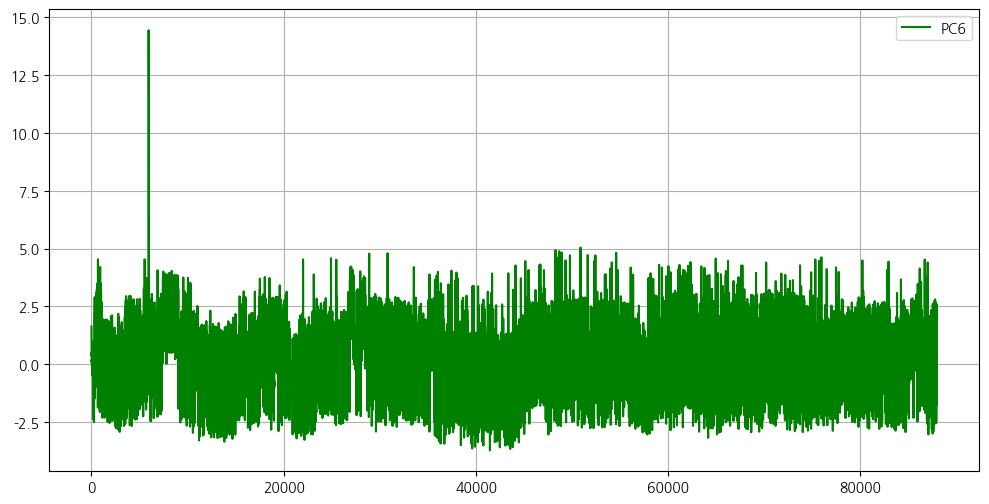

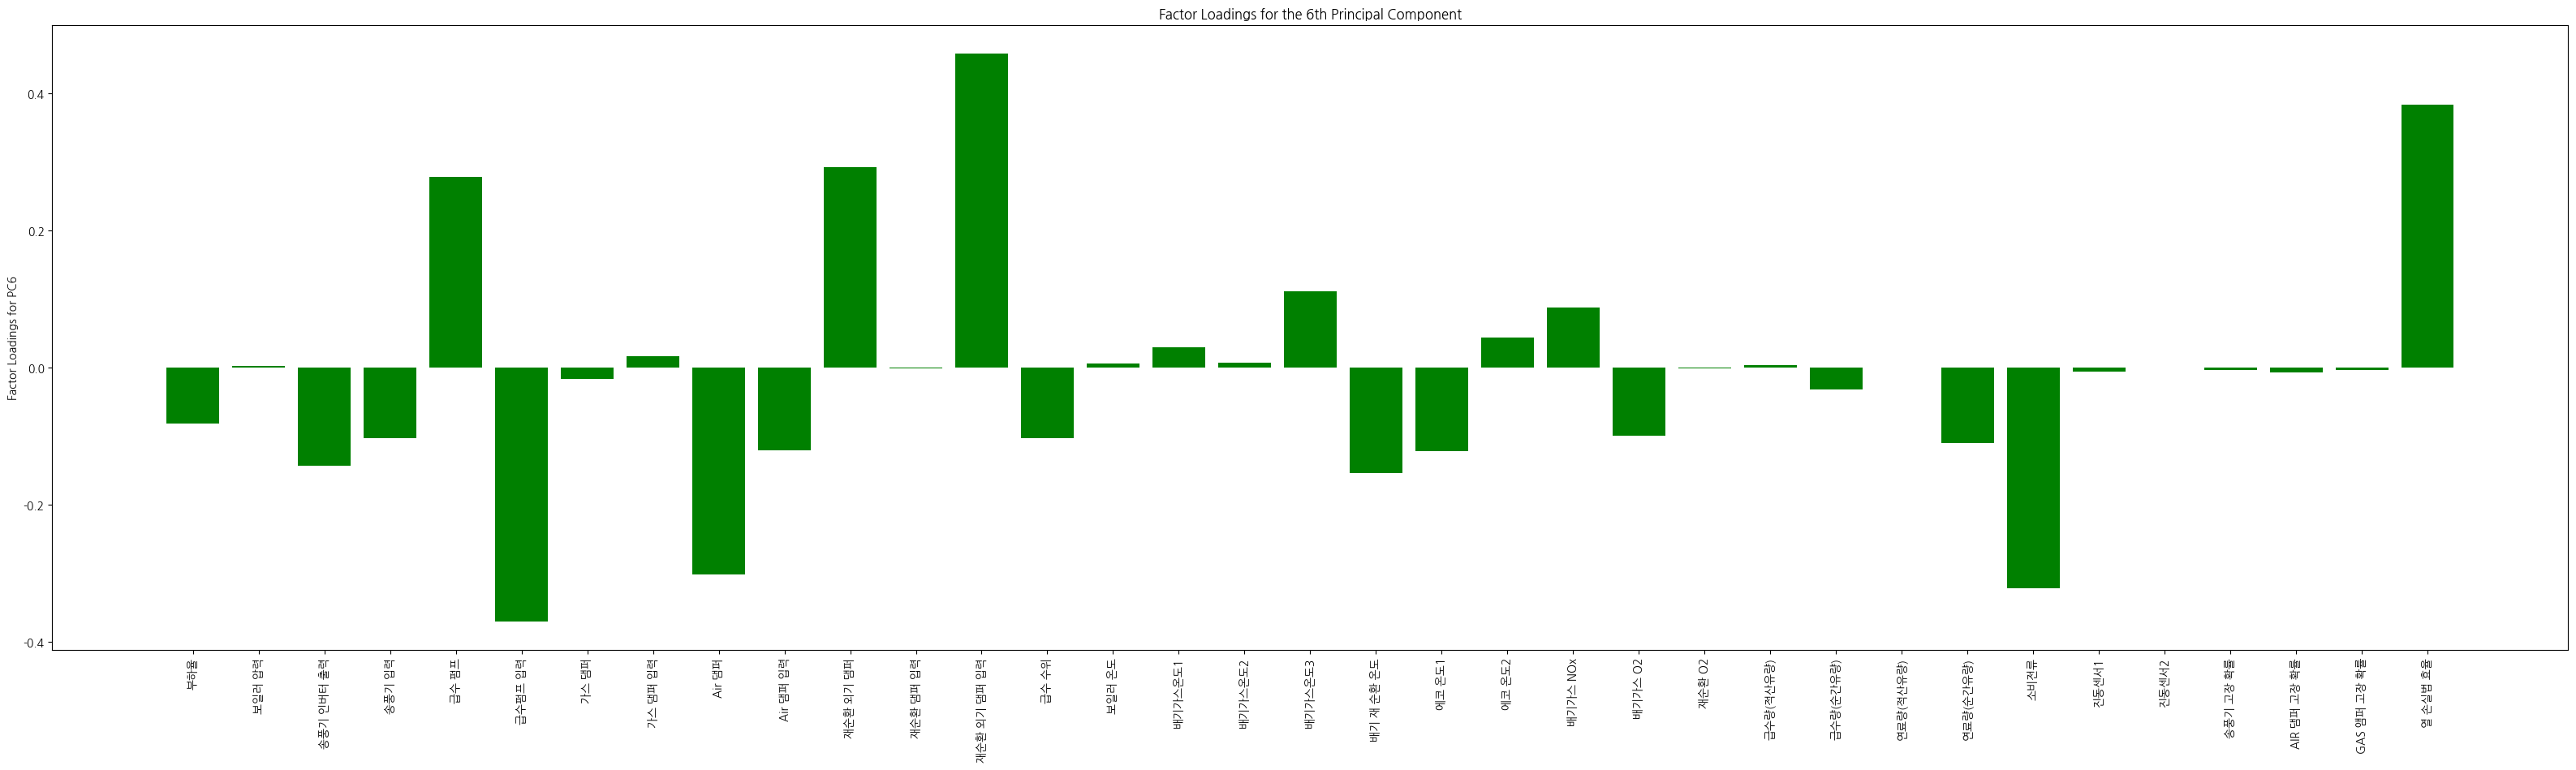

In [17]:
Cumulative_df = pca_df['PC6']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC6', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[5]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC6')
plt.title('Factor Loadings for the 6th Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()

#### 일곱번쨰 주성분 분석

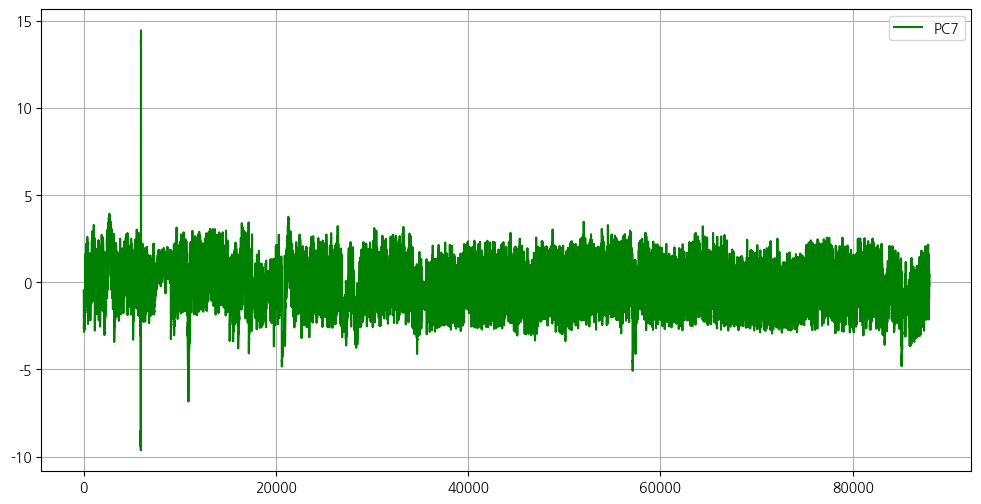

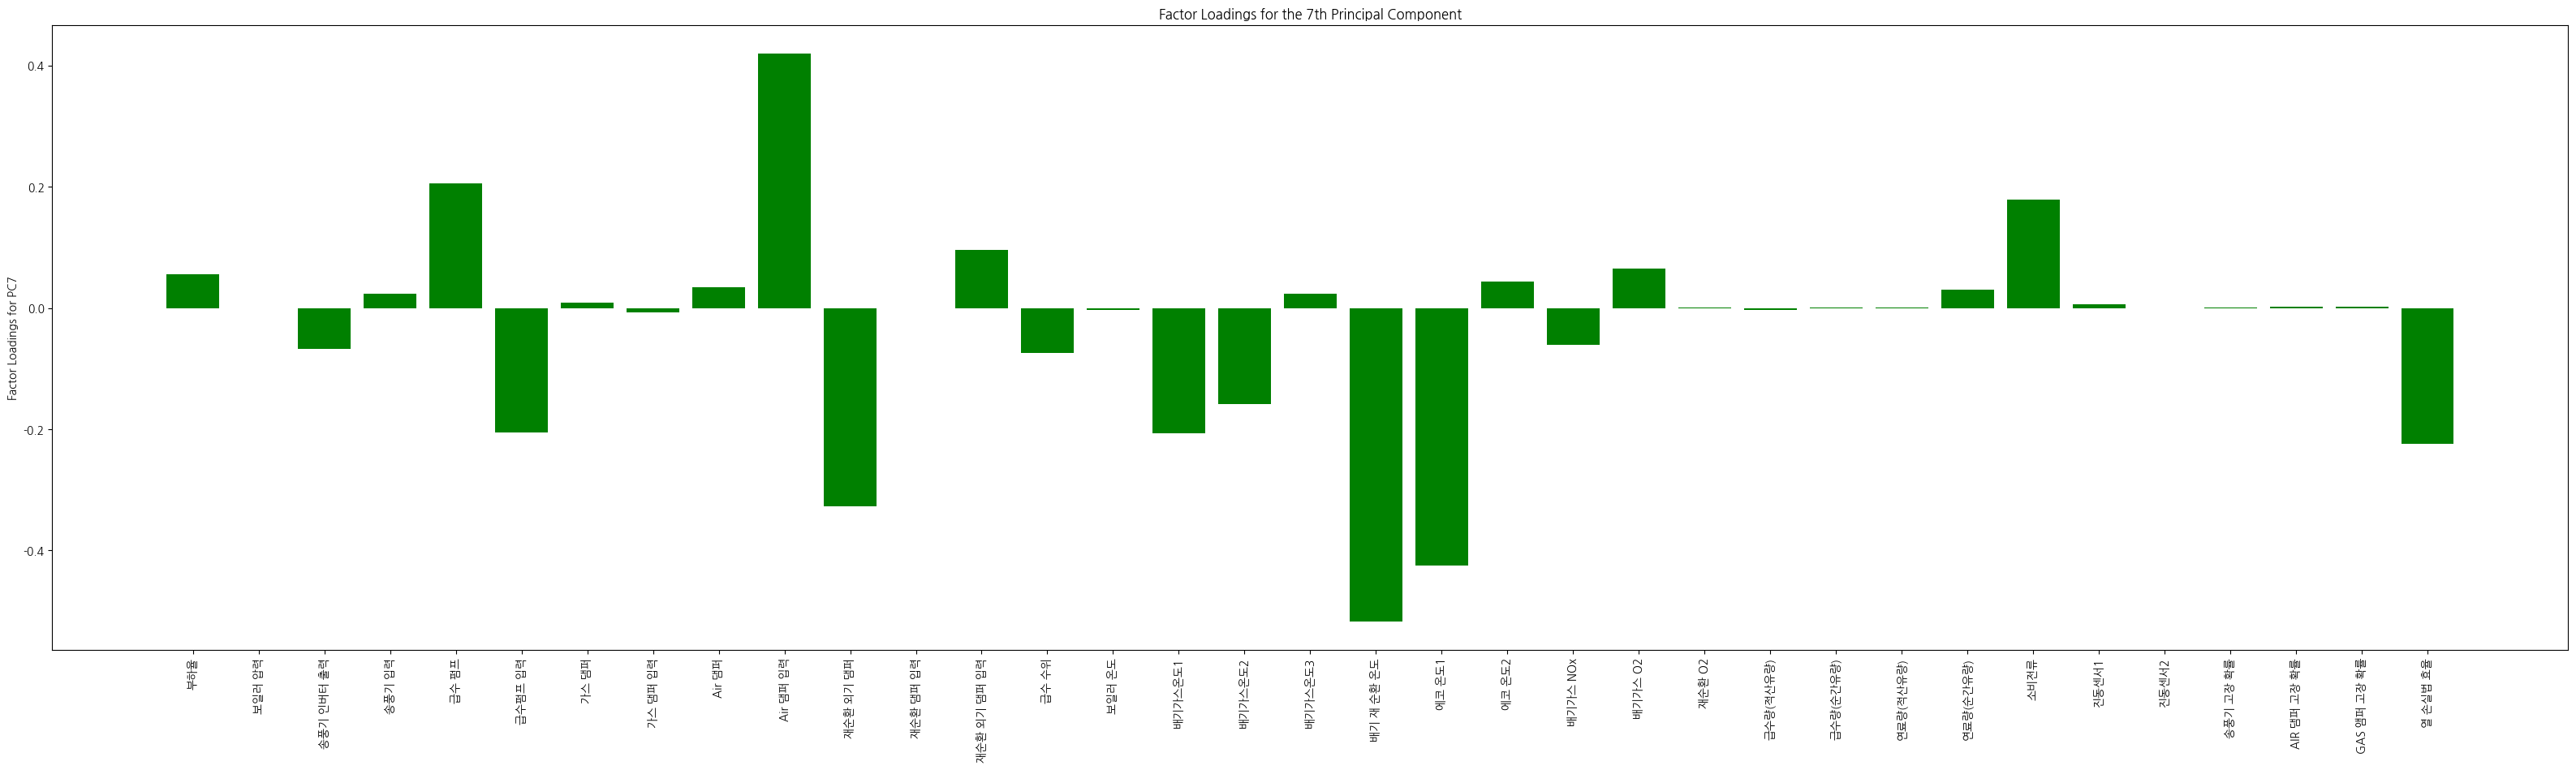

In [18]:
Cumulative_df = pca_df['PC7']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC7', color='green')
plt.legend()
plt.grid(True)
plt.show()

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[6]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
bars = plt.bar(range(len(factor_loadings)), factor_loadings, color='green')
plt.ylabel('Factor Loadings for PC7')
plt.title('Factor Loadings for the 7th Principal Component')
plt.xticks(range(len(factor_loadings)), data.columns, rotation='vertical')
plt.show()